# Visualisation of the model

In [1]:
%load_ext autoreload

In [2]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from diff3d import DLA_diff3d
from diff2d import DLA_diff2d
from randomwalk_3d import randomwalk_3D
from randomwalk_2d import randomwalk_2D

import seaborn as sns
from collections import Counter
import itertools
import matplotlib.pyplot as plt

sns.set()
sns.set_context("talk")

In [3]:
def generate_tree_diff3d(PS):
    x, y, z = [40, 60, 40]
    eta = 1
    dla = DLA_diff3d(seed=[x//2, y - 1, z//2], x = x, y = y, z = z, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla


def generate_tree_randomwalk3d(PS):
    x, y, z = [40, 60, 40]
    dla = randomwalk_3D(seed=[x // 2, y - 1, z // 2], x = x, y = y, z = z, PS = PS)

    # number of points
    for i in tqdm(range(150)):
        while (dla.walking == True):
            
            # walk with maximum probability of sticking to cluster (1 - p_stick = 0)
            dla.walker(0, i + 1)
            
        dla.walking = True
        
    return dla


def generate_tree_diff2d(PS):
    x, y = [40, 60]
    eta = 1
    dla = DLA_diff2d(seed=[x//2, y - 1], x = x, y = y, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla


def generate_tree_randomwalk2d(PS):
    x, y = [40, 60]
    dla = randomwalk_2D(seed=[x // 2, y - 1], x = x, y = y, PS = PS)

    # number of points
    for i in tqdm(range(150)):
        while (dla.walking == True):
            
            # walk with maximum probability of sticking to cluster (1 - p_stick = 0)
            dla.walker(0, i + 1)
            
        dla.walking = True
        
    return dla

In [4]:
PSs = [10, 40]

generated_trees = dict()

In [5]:
for PS in PSs:
    generated_trees[PS] = []

for PS in PSs:
      
    # change model here
    generated_trees[PS].append(generate_tree_randomwalk2d(PS))
        
generated_trees

{10: [<randomwalk_2d.randomwalk_2D at 0x2e573a79ac8>],
 40: [<randomwalk_2d.randomwalk_2D at 0x2e573aac160>]}

In [9]:
dla = generated_trees[40][0]

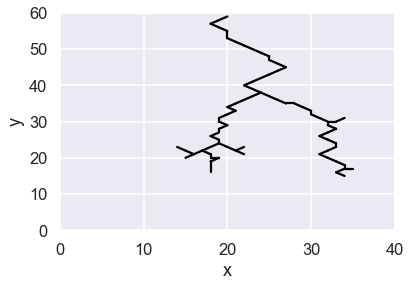

In [10]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(*dla.tree.bounds[0])
ax.set_ylim(*dla.tree.bounds[1])
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_title("2D plot")

for node in dla.tree:
    if node.parent_node:
        parent = node.parent_node
        xp, yp = parent.coords
        xc, yc = node.coords

        if xp == dla.tree.bounds[0][0] and xc == dla.tree.bounds[0][1] - 1:
            xp = dla.tree.bounds[0][1]
        elif xp == dla.tree.bounds[0][1] - 1 and xc == dla.tree.bounds[0][0]:
            xp = dla.tree.bounds[0][0] - 1

        ax.plot([xp, xc], [yp, yc], c='black')

plt.savefig("../results/final_random_2d_PS40.png", bbox_inches="tight")
plt.show()

IndexError: list index out of range

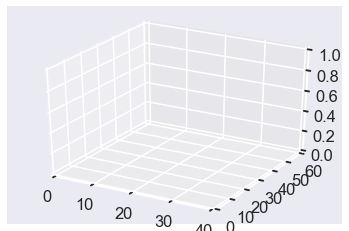

In [8]:
## 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(*dla.tree.bounds[0])
ax.set_ylim(*dla.tree.bounds[1])
ax.set_zlim(*dla.tree.bounds[2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(0, 0)

for node in dla.tree:
    if node.parent_node:
        parent = node.parent_node
        xp, yp, zp = parent.coords
        xc, yc, zc = node.coords

        if xp == dla.tree.bounds[0][0] and xc == dla.tree.bounds[0][1] - 1:
            xp = dla.tree.bounds[0][1]
        elif xp == dla.tree.bounds[0][1] - 1 and xc == dla.tree.bounds[0][0]:
            xp = dla.tree.bounds[0][0] - 1

        if zp == dla.tree.bounds[2][0] and zc == dla.tree.bounds[2][1] - 1:
            zp = dla.tree.bounds[2][1]
        elif zp == dla.tree.bounds[2][1] - 1 and zc == dla.tree.bounds[2][0]:
            zp = dla.tree.bounds[2][0] - 1

        ax.plot3D([xp, xc], [yp, yc], [zp, zc], c='black')


# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(1, angle)
    plt.savefig("movie/img" + str(angle) + ".png", bbox_inches = "tight")

In [ ]:
import io
from IPython.display import Image
import re
import imageio
import glob

filenames = glob.glob('movie/*.png')
path = "movie"

_nsre = re.compile('([0-9]+)')

def natural_sort_key(s):
    """
    Sort alphanumerical strings using natural sort.
    """
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)]   

# sort filenames
new = sorted(filenames,key=natural_sort_key)

# save images
images = []
for filename in new:
    images.append(imageio.imread(filename))

# make gif
imageio.mimsave(f'movie/movie_diff_PS40.gif', images, fps=10)
from IPython.display import HTML
HTML(f'<img src="movie/movie_diff_PS40.gif">')